Hello everyone, this is the first thing that I'm putting on the kaggle and from now I will continously updating it.<br>
So as a beginner it is difficult to get this done I have referred to others expert's kernel's which is [here](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python) and [here](https://www.kaggle.com/masumrumi/a-detailed-regression-guide-with-house-pricing) and there are so many other great kernels to look into.<br>
The main aim behind this kernel to make understand basics to beginner and give little understanding about exploratory data analysis approach.<br>



In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading data
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# checking the dimension of datasets
train.shape, test.shape

((1460, 81), (1459, 80))

In [4]:
# ckeck the columns
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

linear regression model makes a good amount of **assumptions** for the data you provide

1. Linearity 
2. No noise 
3. No collinearity
4. Normal distribution
5. Scale

## Missing data

### Handling missing data from both test and train datasets

_Handling missing values is an essential part of data cleaning and preparation process_.<br>
***np.nan, None and NaT (for datetime64 types)*** _are standard missing value for Pandas_.<br>
_Not all missing values come in nice and clean **np.nan or None format** instead there may be some characters like `??`or `--`,etc_.

In [5]:
# missing data from train dataset
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
#percent = (train.isnull().sum()/len(train)).sort_values(ascending=False) we can do as
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
#print(missing_data['Percent'].mean())
missing_data.head(30)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [6]:
#Edited:
# np.nan

import numpy as np

myarr = np.array([1, 0, np.nan, 3])

print(myarr)


# Edited:
train.isnull().sum().sort_values(ascending=False)
(train.isnull().sum()/len(train)).sort_values(ascending=False)

[ 1.  0. nan  3.]


PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 81, dtype: float64

We will delete the variable when there is more then **15% missing data**, according to this 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage' will get deleted.

'GarageType','GarageYrBlt', 'GarageFinish', 'GarageQual','GarageCond' have the same number of missing data so this missing data refers to the same set of observation so we delete this variables and we have considered 'GarageCars' which expressed the most of the information about the garage.

Same logic goes for 'BsmtExposure', 'BsmtFinType1','BsmtQual','BsmtCond','BsmtFinType2'.
'MasVnrArea' and 'MasVnrType' haave strong corelation with 'YearBuilt' and 'OverallQual' which we have already considered.

Finally 'Electrical' have only one null value so we replace it with its mode.


In [7]:
# Dealing with missing data
train = train.drop((missing_data[missing_data['Total']>1]).index,1)
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
train.isnull().sum().max()

0

In [8]:
#edited
#train.drop((missing_data[missing_data['Total']>1]).index,axis='columns')

In [9]:
# After deleting the columns 
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [10]:
# missing data from test dataset
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data1 = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data1.head(40)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
GarageQual,78,0.053461
GarageFinish,78,0.053461
GarageCond,78,0.053461


As we did before for **train** data same logic applies here for **test** data.

In [11]:
test = test.drop((missing_data1[missing_data1['Total']>4]).index,1)

In [12]:
# missing data from test dataset
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data1 = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data1.head(40)

,Total,Percent
MSZoning,4,0.002742
Functional,2,0.001371
BsmtFullBath,2,0.001371
BsmtHalfBath,2,0.001371
Utilities,2,0.001371
BsmtUnfSF,1,0.000685
BsmtFinSF2,1,0.000685
Exterior2nd,1,0.000685
GarageCars,1,0.000685
GarageArea,1,0.000685


For `categorical variables` and `numerical variable` we are just filling the **Null** values with most frequent(**mode**) from specified columns.

In [13]:
null_features = (missing_data1[missing_data1['Total']>0]).index
null_features

Index(['MSZoning', 'Functional', 'BsmtFullBath', 'BsmtHalfBath', 'Utilities',
       'BsmtUnfSF', 'BsmtFinSF2', 'Exterior2nd', 'GarageCars', 'GarageArea',
       'BsmtFinSF1', 'KitchenQual', 'Exterior1st', 'TotalBsmtSF', 'SaleType'],
      dtype='object')

In [14]:
for feature in null_features:
    test[feature] = test[feature].fillna(test[feature].mode()[0])

In [15]:
# check again if there is any null values
test.isnull().sum().max()

0

## Analysing SalePrice 

In [16]:
#Descriptive statistics summary
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

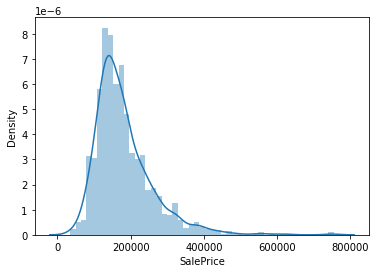

In [17]:
#histogram
sns.distplot(train['SalePrice']);

##### Let's focus on 1st asumption

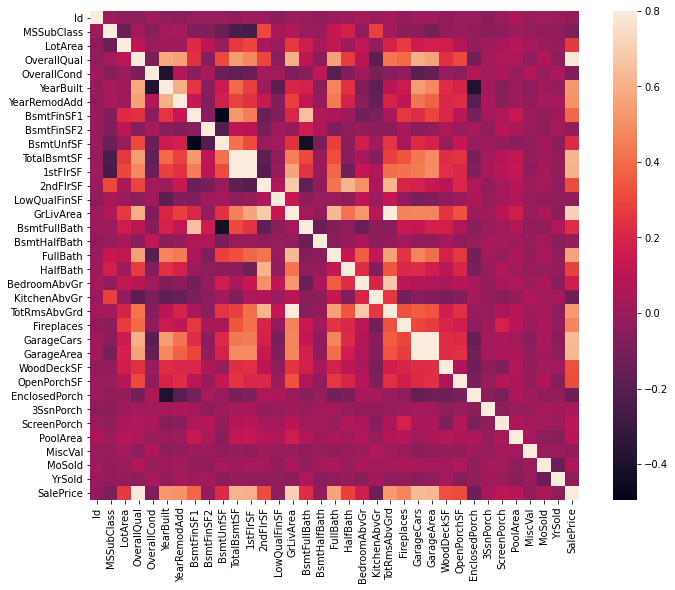

In [18]:
# correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square = True);

We used **heatmap** here, so we can get the overview of all the features relationship 

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

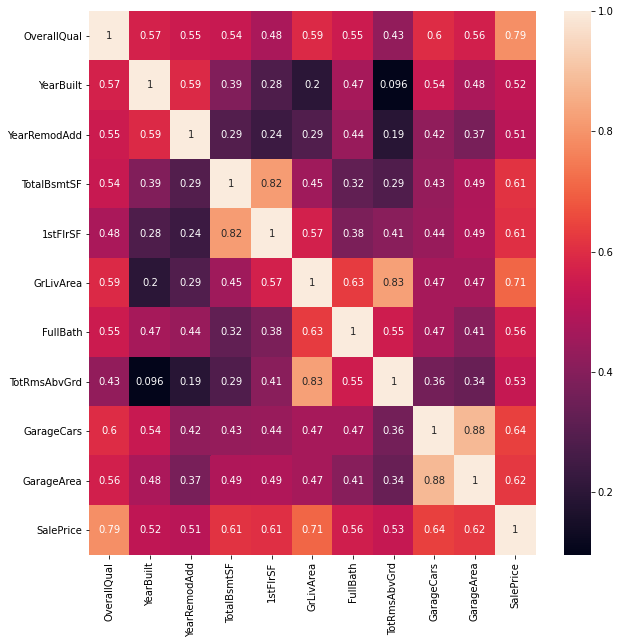

In [19]:
# most correlated features 
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat['SalePrice'])>0.5]
plt.figure(figsize=(10,10))
sns.heatmap(train[top_corr_features].corr(),annot = True);
top_corr_features

This are the features most **correlated** with the 'SalePrice'.

**OverallQual, GrLivArea, GarageCars and TotalBsmtSF** are strongly correlated with the 'SalePrice'.

**GarageCars** and **GarageArea** are also some of the most strongly correlated variables.

Same goes for **TotalBsmtSF** and **1stFloor**.

## Scatter plot between 'SalePrice' and its correlated Variables 

In [20]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
#sns.pairplot(train[cols], size = 2.5)
plt.show();

## Fixing Skewness

##### Lets focus on 4th assumption, and that is that predictors and target variable should follow a gaussian distribution. 

Here we are using **Log Transform**

In [21]:
# differentiate between numerical and categorical varibles
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns

In [22]:
# taking numerical dataset and categorical datasets separately 
train_num = train[numerical_features]
train_cat = train[categorical_features]

In [23]:
# checkin skewmess of all features
skewness = train_num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
Id                0.000000
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
dtype: float64

In [24]:
#edited 
#Skew = 3 * (train_num['MiscVal'].mean()- train_num['MiscVal'].median()) / train_num['MiscVal'].std()
#train_num.skew().sort_values(ascending=False)

##### we are selecting features where skewness is greater than 0.5 to fix their skewness

In [25]:
skewness = skewness[abs(skewness)>0.5] #abs() is used for absolute value
skewness.index

Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice'],
      dtype='object')

In [26]:
train_num

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


In [27]:
# applying log tranform
train_num[skewness.index] = np.log1p(train_num[skewness.index])

In [28]:
# Python program explaining
# log1p() function
import numpy as np

in_array = [1, 3, 5]
print ("Input array : ", in_array)

out_array = np.log1p(in_array) # natural logarithmic value of x+1    # log1p is reverse of exp(x) – 1.
print ("Output array : ", out_array)


Input array :  [1, 3, 5]
Output array :  [0.69314718 1.38629436 1.79175947]


In [29]:
#Edited
import numpy as np
np.log(5)

1.6094379124341003

In [30]:
train_num[skewness.index]

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,4.110874,9.042040,1.791759,7.602900,7.602900,6.561031,0.000000,5.017280,6.753438,6.753438,...,2.197225,0.000000,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,12.247699
1,3.044522,9.169623,2.197225,7.589336,7.589336,6.886532,0.000000,5.652489,7.141245,7.141245,...,1.945910,0.693147,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,12.109016
2,4.110874,9.328212,1.791759,7.601902,7.602401,6.188264,0.000000,6.075346,6.825460,6.825460,...,1.945910,0.693147,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,12.317171
3,4.262680,9.164401,1.791759,7.557995,7.586296,5.379897,0.000000,6.293419,6.629363,6.869014,...,2.079442,0.693147,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,11.849405
4,4.110874,9.565284,1.791759,7.601402,7.601402,6.486161,0.000000,6.196444,7.044033,7.044033,...,2.302585,0.693147,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,8.976894,1.791759,7.600902,7.601402,0.000000,0.000000,6.860664,6.860664,6.860664,...,2.079442,0.693147,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.000000,12.072547
1456,3.044522,9.486152,1.945910,7.590347,7.595387,6.673298,5.099866,6.380123,7.341484,7.637234,...,2.079442,1.098612,5.857933,0.000000,0.000000,0.0,0.0,0.0,0.000000,12.254868
1457,4.262680,9.109746,2.302585,7.571474,7.604396,5.620401,0.000000,6.777647,7.050123,7.080868,...,2.302585,1.098612,0.000000,4.110874,0.000000,0.0,0.0,0.0,7.824446,12.493133
1458,3.044522,9.181735,1.945910,7.576097,7.599401,3.912023,6.937314,0.000000,6.983790,6.983790,...,1.791759,0.000000,5.905362,0.000000,4.727388,0.0,0.0,0.0,0.000000,11.864469


In [31]:
train_num.shape

(1460, 35)

In [32]:
# using get_dummies here it is used for data manipulation. It converts categorical data into dummy or indicator variables
train_cat = pd.get_dummies(train_cat)

In [33]:
train_cat.shape

(1460, 187)

In [34]:
# concatenating train_num (numerical variable) and train_cat (categorical variable)
train1 = pd.concat([train_cat,train_num],axis=1)

In [35]:
#train1.shape

## Skewness of test data

#### same applies here as we did for train data

In [36]:
# differentiate between numerical and categorical varibles
categorical_features = test.select_dtypes(include = ["object"]).columns
numerical_features = test.select_dtypes(exclude = ["object"]).columns

test_num = train[numerical_features]
test_cat = train[categorical_features]

In [37]:
# finding skewness of all features
skewness = test_num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
Id                0.000000
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
dtype: float64

In [38]:
# we are selecting features where skewness is greater than 0.5 to fix their skewness
skewness = skewness[abs(skewness)>0.5]
skewness.index

Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')

In [39]:
# applying log tranform
test_num[skewness.index] = np.log1p(test_num[skewness.index])

In [40]:
test_cat = pd.get_dummies(test_cat)

In [41]:
test1 = pd.concat([test_cat,test_num],axis=1)

## Outliers

### Using 3 standard deviation to remove outliers 

**`Standard Deviation `** means simply it shows you how far away data point from the mean.<br>
If our dataset is normally distributed then most of the data fall under `1 standard deviation nearly 68% of data`.<br>
Here we will use **`3 standard deviation` to `remove outliers`**. 
Nearly **`99.7%`** of values are within **`3 standard deviation`** of the mean and the data `outside the 3 standard deviation` we consider them as `outlier's`. 

In [42]:
# set minimum and maximum threshold values to detect ouliers using standard deviation
min_threshold = train1.SalePrice.mean() - 3*train1.SalePrice.std()
max_threshold = train1.SalePrice.mean() + 3*train1.SalePrice.std()

In [43]:
#edited
data = {'col_0': [9, -3, 0, -1, 5], 'col_1': [-2, -7, 6, 8, -5]}
th = pd.DataFrame(data)
th.clip(-4, 6)

,col_0,col_1
0,6,-2
1,-3,-4
2,0,6
3,-1,6
4,5,-4


In [44]:
min_threshold,max_threshold

(10.825709574950887, 13.222405214885926)

In [45]:
(train1['SalePrice']>max_threshold).value_counts()

False    1453
True        7
Name: SalePrice, dtype: int64

In [46]:
(train1['SalePrice']<min_threshold).value_counts()

False    1455
True        5
Name: SalePrice, dtype: int64

In [47]:
train1[train1['SalePrice']<min_threshold]

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
30,1,0,0,0,0,0,1,0,0,0,...,0.0,4.007333,5.153292,0.0,0.0,0.0,0.0,7,2008,10.596660
495,1,0,0,0,0,0,1,0,0,0,...,0.0,6.261492,4.753590,0.0,0.0,0.0,0.0,11,2009,10.460271
533,0,0,0,1,0,0,1,0,0,0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1,2007,10.579005
916,1,0,0,0,0,0,1,0,0,0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,10,2006,10.471978
968,0,0,0,0,1,0,1,0,0,0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2009,10.542733


In [48]:
# removing the outlier's from dataset
train1 = train1[(train1.SalePrice>max_threshold) & (train1.SalePrice)<min_threshold]

In [49]:
#edited
((train1.SalePrice>max_threshold)&(train1.SalePrice)<min_threshold)

0       True
1       True
2       True
3       True
4       True
        ... 
1455    True
1456    True
1457    True
1458    True
1459    True
Name: SalePrice, Length: 1460, dtype: bool

In [50]:
# Edited
(train1.SalePrice>max_threshold).value_counts()
((train1.SalePrice)<min_threshold).value_counts()

False    1455
True        5
Name: SalePrice, dtype: int64

In [51]:
train1.shape

(1460, 222)

## Modeling 

In [52]:
# importing all the required library for modeling here we are going to use statsmodels 
import statsmodels.api as sm

Now our task will be training and testing the data, so we need to drop the `SalePrice` from the training dataset and will assign it to the `y`

In [53]:
# assining the required data to the respective variables  
X = train1.drop(['SalePrice'],axis=1)
y = train1['SalePrice']

In [54]:
X = sm.add_constant(X)
test = sm.add_constant(test1)

In [55]:
# checking shapes
X.shape,y.shape

((1460, 222), (1460,))

In [56]:
model = sm.OLS(y, X).fit()

In [58]:
predictions = model.predict(test)

In [59]:
predictions

0       12.255874
1       12.140110
2       12.301778
3       12.038344
4       12.607543
          ...    
1455    12.070823
1456    12.222957
1457    12.543784
1458    11.845976
1459    11.859671
Length: 1460, dtype: float64

In [60]:
print("ROOT MEAN SQUARED ERROR : ",math.sqrt(sum((y-predictions)**2)/len(y)))

ROOT MEAN SQUARED ERROR :  0.09676529753408478


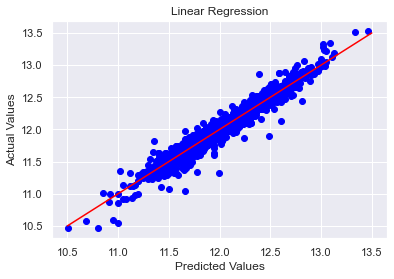

In [61]:
# parity plot  
plt.scatter(predictions,y,color='blue')
plt.title('Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.plot([10.5,13.5],[10.5,13.5],c='red')
plt.show()

The above scatterplot comparing the actual values against predicted values in an easy understandable way.

In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     105.8
Date:                Mon, 16 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:58:05   Log-Likelihood:                 1338.1
No. Observations:                1460   AIC:                            -2290.
Df Residuals:                    1267   BIC:                            -1270.
Df Model:                         192                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.0553      1.026     -3.954      0.000      -6.067      -2.043
MSZoning_C (all)         -1.1342      0.210     -5.404      0.000      -1.546      -0.722
MSZoning_FV              -0.6977      0.206     -3.382      0.001      -1.102      -0.293
MSZoning_RH              -0.7347      0.206     -3.571      0.000      -1.138      -0.331
MSZoning_RL              -0.7366      0.205     -3.595      0.000      -1.139      -0.335
MSZoning_RM              -0.7522      0.206     -3.645      0.000      -1.157      -0.347
Street_Grvl              -2.0899      0.514     -4.067      0.000      -3.098      -1.082
Street_Pave              -1.9654      0.513     -3.831      0.000      -2.972      -0.959
LotShape_IR1             -1.0295      0.256     -4.014      0.000      -1.533      -0.526
LotShape_IR2             -1.0138      0.257     -3.942      0.000      -1.518      -0.509
LotShape_IR3             -0.9885      0.258     -3.828      0.000      -1.495      -0.482
LotShape_Reg             -1.0235      0.256     -3.991      0.000      -1.527      -0.520
LandContour_Bnk          -1.0344      0.256     -4.035      0.000      -1.537      -0.531
LandContour_HLS          -0.9914      0.257     -3.852      0.000      -1.496      -0.487
LandContour_Low          -1.0290      0.257     -4.001      0.000      -1.534      -0.524
LandContour_Lvl          -1.0005      0.256     -3.903      0.000      -1.503      -0.498
Utilities_AllPub         -1.8967      0.519     -3.658      0.000      -2.914      -0.879
Utilities_NoSeWa         -2.1585      0.513     -4.204      0.000      -3.166      -1.151
LotConfig_Corner         -0.7823      0.206     -3.800      0.000      -1.186      -0.378
LotConfig_CulDSac        -0.7628      0.207     -3.691      0.000      -1.168      -0.357
LotConfig_FR2            -0.8219      0.206     -3.984      0.000      -1.227      -0.417
LotConfig_FR3            -0.8925      0.208     -4.289      0.000      -1.301      -0.484
LotConfig_Inside         -0.7957      0.206     -3.867      0.000      -1.199      -0.392
LandSlope_Gtl            -1.3469      0.342     -3.937      0.000      -2.018      -0.676
LandSlope_Mod            -1.3071      0.342     -3.823      0.000      -1.978      -0.636
LandSlope_Sev            -1.4013      0.343     -4.080      0.000      -2.075      -0.728
Neighborhood_Blmngtn     -0.1317      0.053     -2.473      0.014      -0.236      -0.027
Neighborhood_Blueste     -0.1561      0.086     -1.823      0.069      -0.324       0.012
Neighborhood_BrDale      -0.1612      0.051     -3.133      0.002      -0.262      -0.060
Neighborhood_BrkSide     -0.1392      0.042     -3.279      0.001      -0.222      -0.056
Neighborhood_ClearCr     -0.1456      0.050     -2.922      0.004      -0.243      -0.048
Neighborhood_CollgCr   